The following Shallow AE follows the same architecture and parameters as the NCAE in the paper *Deep Learning of Part-Based Autoencoders with Nonnegativity Constraints*, by Hosseini-Asl, Zurada, Nasraoui 2016.

The architecture is:
*  Shallow encoder and decoder
*  Asymetric Weight Decay sparsity regularizer in both layers: 
    * Posotive decay: 0
    * Negative decay: 1
    * Decay weight/penalty:0.003
*  Sparsity enforced by KL divergence
    * Sparsity objective: 0.05
    * Sparsity weight/penalty: 3
    
Difference with the architecture from the paper:
*  The output layer as a leakyRELU activation, instead of a sigmoid one
*  No Greedy Layer-wise pre-training

In [2]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../SourceCode')
import bastien_utils
from nonNegSparseShallowAE import Sparse_NonNeg_ShallowAE_KLsum_AsymDecay
import datetime
import morphoMaths
import keras
import pandas as pd
keras.__version__

Using TensorFlow backend.


'2.2.0'

In [3]:
FILE_PATH = "../"
x_small, _ = bastien_utils.load_data(FILE_PATH, train=False, test=False, subsetTest=True)
print('x_small shape:', x_small.shape)

x_small shape: (10, 28, 28, 1)


In [4]:
pd.read_csv("../ShallowAE/Sparse_NonNeg/KLdivSum_AsymDecay/TestOutputs/18_08_17results")

,Unnamed: 0,SVM_best_C,SVM_best_gamma,SVM_classification_score,dimension,test_error,test_max_approx_error_toOriginal_dilatation,test_max_approx_error_toRec_dilatation,test_sparsity,training_error,training_max_approx_error_toOriginal_dilatation,training_max_approx_error_toRec_dilatation,training_sparsity
0,0,1000.0,100.0,0.583,100,0.08357,0.107469,0.00065,0.000141,0.083929,0.107853,0.000655,0.000142


We note:
* That the best C and gamma for the classification are the largest possible value (also quite unlikely values usually), for a poor classification score
* A quite poor reconstruction error (among the biggest, usually when the reconstruction is blurry)
* A very small sparsity measure, sparsity should be close to one, except it ALL components are very small, which is NOT the intended behavior. This indicates a two strong sparsity constraint.
* A quite high max approximation error to dilatation of the original.
* A very low max approximation error to dilatation of the reconstruction (the reconstruction is probably blurry).
* Most values are almost the same for training and testing (common behaviour, our model does not have enough capacity).

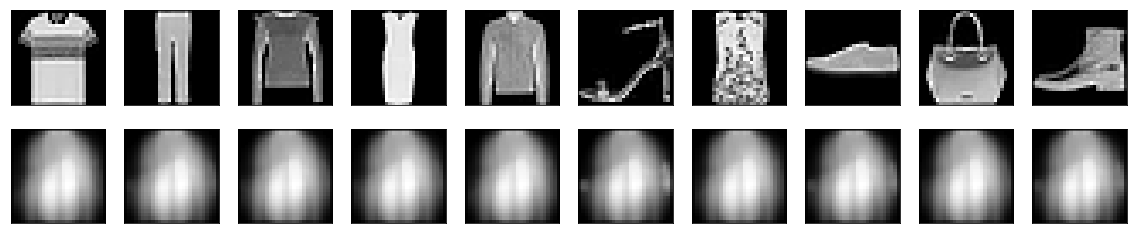

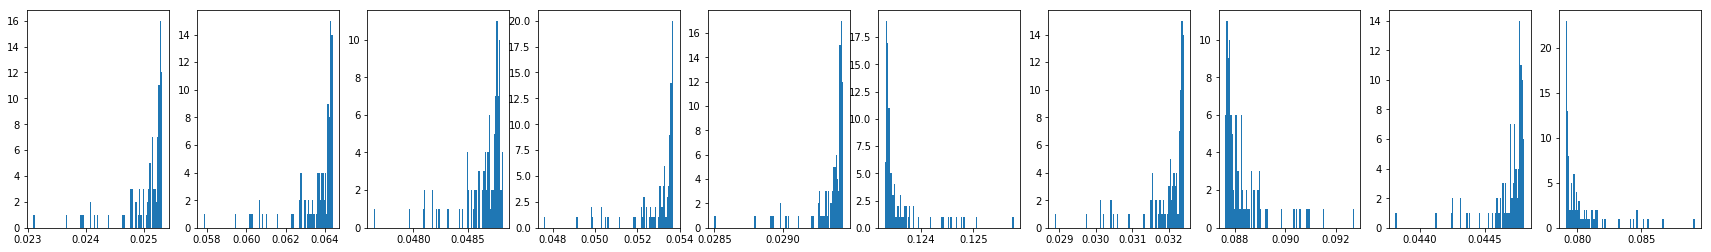

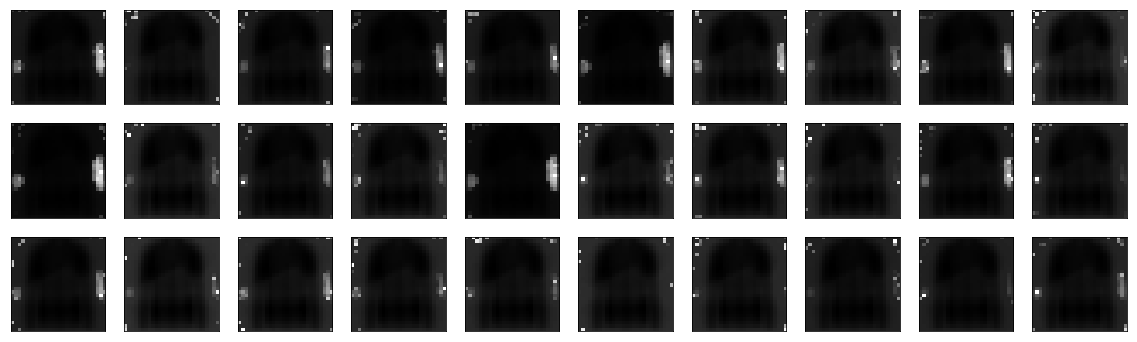

In [14]:
AE = Sparse_NonNeg_ShallowAE_KLsum_AsymDecay.load('18_08_17_dim100_KLdivSum_3_0.05_AsymDecay_0_1_0.003.h5')
AE.plot_reconstructions(x_small)
AE.plot_histograms_of_the_encoding(x_small)
AE.plot_atoms_decoder(nb_to_plot=30)

In [15]:
AE.get_parameters_value()

{'sparsity_weight': 3.0,
 'sparsity_objective': 0.05000000074505806,
 'decay_positive_weights': 0.0,
 'decay_negative_weights': 1.0,
 'decay_weight': 0.003000000026077032}

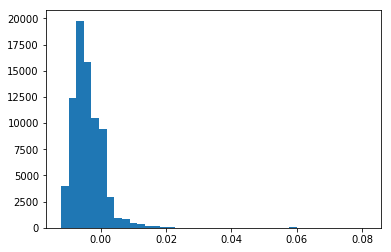

In [20]:
plt.hist(AE.atom_images_encoder(normalize=False).flatten(), bins=40)
plt.show()

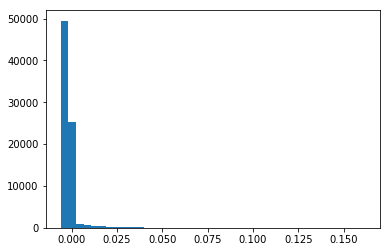

In [21]:
plt.hist(AE.atom_images_decoder(normalize=False).flatten(), bins=40)
plt.show()

**Most weights are smaller than 0 (eventhough very small)!!!**

In [22]:
x_test, _ = bastien_utils.load_data(FILE_PATH, train=False, test=True, subsetTest=False)
print('x_test shape:', x_test.shape)

x_test shape: (10000, 28, 28, 1)


In [23]:
AE.sparsity_measure(x_test)

0.00014081204